# 3.6 – Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements. For full details see [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

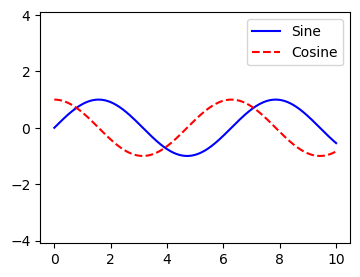

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend();

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

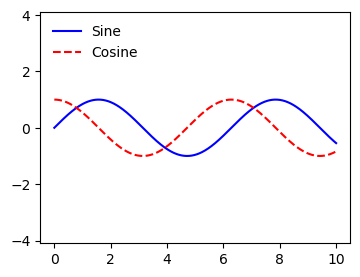

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the ``ncol`` command to specify the number of columns in the legend:

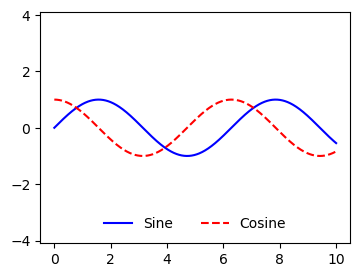

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

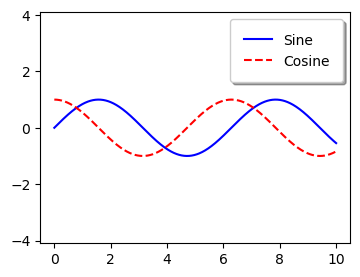

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

**Your turn.** 
- Plot $x \sin(x)$, $x \sin(2x)$, and $x \sin(3x)$ for $1\le x \le 2\pi$. 
- Add labels ``$x\cdot\sin(x)$``, ``$x\cdot\sin(2x)$``, and ``$x\cdot\sin(3x)$``, respectively. 
- Set x axis limits to $(0,2\pi)$ and y axis limits to $(-7.5,7.5)$. 
- Then draw a single row legend at the upper center location.

You should reproduce the following plot.

![figure](figures/xsin.png)

In [6]:
# write your code here



For more information on available legend options, see the ``plt.legend`` docstring.

## Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

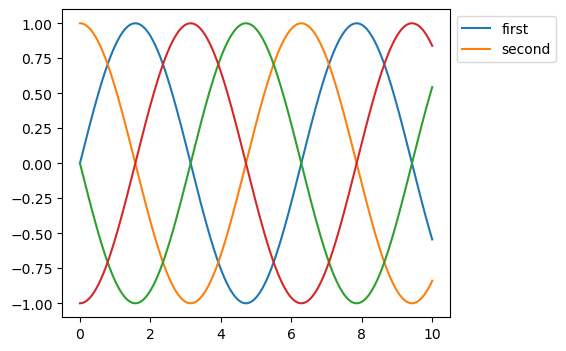

In [7]:
x = np.linspace(0, 10, 1000)
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)) # y.shape = (1000,4)
plt.figure(figsize=(5,4))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2],  ['first', 'second'], framealpha=0.75, bbox_to_anchor=(1, 1));

In practice it is often clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

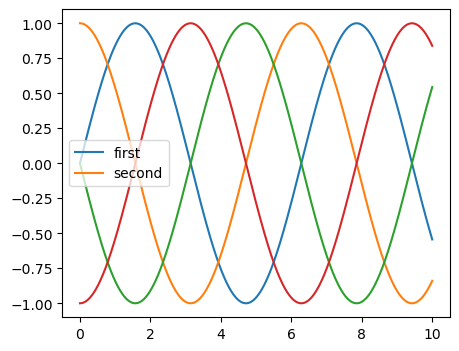

In [8]:
plt.figure(figsize=(5,4))
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=0.75, frameon=True);

Notice that by default, the legend ignores all elements without a ``label`` attribute set.

**Your turn.** Repeat the plot above only this time change the line style of the first and the third plot elements to dashed. Then add a legend for the first and the third plot elements only. Hint: there are four plot elements in total. You will need to modify the code above to complete this task.

In [9]:
# write your code here



## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

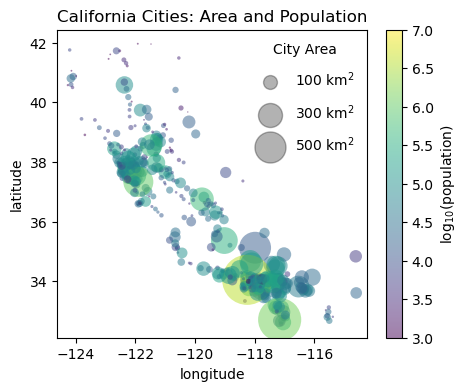

In [10]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.figure(figsize=(5,4))
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7) # colour limits

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, 
           labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.

Finally, note that for geographic data like this, it would be clearer if we could show state boundaries or other map-specific elements.

**Your turn.** Dataset ``data/uk_cities.csv`` contains similar data for UK cities. Read the dataset and produce a similar plot to the one above. 

You should reproduce the following plot.

![figure](figures/uk.png)

In [11]:
# write your code here



## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

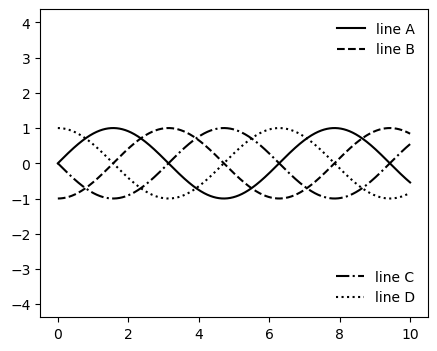

In [12]:
fig, ax = plt.subplots(figsize=(5,4))

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')


# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of ``ax.legend()`` (recall that you can do this with within the IPython notebook using ``ax.legend??``) you'll see that the function simply consists of some logic to create a suitable ``Legend`` artist, which is then saved in the ``legend_`` attribute and added to the figure when the plot is drawn.

**Your turn.** 
- Plot $x \sin(x)$, $x \sin(2x)$, $x \sin(3x)$, and $x \sin(4x)$ for $1\le x \le 2\pi$.
- Set x axis limits to $(0,2\pi)$ and y axis limits to $(-7.5,7.5)$. 
- Draw a single-row legend at the upper center location with labels  ``$x\cdot\sin(x)$``, ``$x\cdot\sin(2x)$`` representing the first two plots.
- Draw a single-row legend at the upper center location with labels  ``$x\cdot\sin(3x)$``, ``$x\cdot\sin(4x)$`` representing the last two plots.

You should reproduce the following plot.

![figure](figures/sin_legends.png)

In [13]:
# write your code here



---

<!--NAVIGATION-->
< [3.5 – Histograms, Binnings, and Density](L35_Histograms_and_Binnings.ipynb) | [Contents](../index.ipynb) | [3.7 – Customizing Colorbars](L37_Customizing_Colorbars.ipynb) >

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; also available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*